In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pppppppppp/WhatsApp Image 2025-06-10 at 19.59.13_53986eb1.jpg
/kaggle/input/pigmentation2/Pigmentation/valid/labels/75_jpg.rf.71808329955c669b81c49cd998263a5e.txt
/kaggle/input/pigmentation2/Pigmentation/valid/labels/IMG_2918_jpg.rf.e42af8d2b9b983c2a47fa3a1093516e5.txt
/kaggle/input/pigmentation2/Pigmentation/valid/labels/5_jpg.rf.316959176a8076ff4cf9eda5147c4ce6.txt
/kaggle/input/pigmentation2/Pigmentation/valid/labels/pigmentation-dark-spots_22_jpg.rf.16eedb237f938fa5c0e95fd495d981a8.txt
/kaggle/input/pigmentation2/Pigmentation/valid/labels/melasm73_png_jpg.rf.8d3ac47b187143a0c4d67ac5b466bfec.txt
/kaggle/input/pigmentation2/Pigmentation/valid/labels/melasma66_png_jpg.rf.3242a30b42f8a2e2c04c5424fc3bc51e.txt
/kaggle/input/pigmentation2/Pigmentation/valid/labels/melasma67_png_jpg.rf.80b4665eac9a5cc00b094e269baf5740.txt
/kaggle/input/pigmentation2/Pigmentation/valid/labels/melasma18_jpg.rf.e5c722317cc4b1a29e1d3bf03c94e27f.txt
/kaggle/input/pigmentation2/Pigmentation/valid/l

In [2]:
!pip install ultralytics --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 18.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 8.4 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 30.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.2 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 82.1 MB/s eta 0:00:00:00:0100:01


In [5]:
from ultralytics import YOLO
import os
import shutil

# ================== 1. نقل البيانات ==================
source_dir = "/kaggle/input/pigmentation2/Pigmentation"
target_dir = "/kaggle/working/Pigmentation"
shutil.copytree(source_dir, target_dir, dirs_exist_ok=True)

# ================== 2. تعديل labels إلى class 0 ==================
for split in ["train", "valid", "test"]:
    labels_dir = os.path.join(target_dir, split, "labels")
    for filename in os.listdir(labels_dir):
        if filename.endswith(".txt"):
            path = os.path.join(labels_dir, filename)
            with open(path, "r") as f:
                lines = f.readlines()
            new_lines = ["0 " + " ".join(line.strip().split()[1:]) for line in lines]
            with open(path, "w") as f:
                f.write("\n".join(new_lines))

# ================== 3. إنشاء ملف data.yaml ==================
yaml_content = """
train: /kaggle/input/pigmentation2/Pigmentation/train/images
val: /kaggle/input/pigmentation2/Pigmentation/valid/images
test: /kaggle/input/pigmentation2/Pigmentation/test/images

nc: 1
names: ["Pigmentation"]
"""
with open("data.yaml", "w") as f:
    f.write(yaml_content)

# ================== 4. تحميل YOLOv8m ==================
model = YOLO("yolov8m.pt")

# ================== 5. التدريب مع Augmentation مناسبة ==================
model.train(
    data="data.yaml",
    epochs=70,
    imgsz=640,
    batch=16,
    name="pigmentation_yolo_finetune",
    degrees=5,
    translate=0.1,
    scale=0.4,
    fliplr=0.5,
    mosaic=0.2,
    cos_lr=True,
    patience=15,
    cache=True,
    lr0=0.0005,
    lrf=0.01,
    warmup_epochs=2,
    
    # إلغاء Augmentations الغير مناسبة
    shear=0.0,
    flipud=0.0,
    hsv_h=0.0,
    hsv_s=0.0,
    hsv_v=0.0,
    mixup=0.0
)



100%|██████████| 49.7M/49.7M [00:00<00:00, 242MB/s]


Ultralytics 8.3.152 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=True, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=True, cutmix=0.0, data=data.yaml, degrees=5, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=70, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.0, hsv_s=0.0, hsv_v=0.0, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.0005, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8m.pt, momentum=0.937, mosaic=0.2, multi_scale=False, name=pigmentation_yolo_finetune, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=15, perspective=0.0, plots=True, pose=12.0, pretrained=Tr

100%|██████████| 755k/755k [00:00<00:00, 16.9MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 70.8MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.2±0.2 ms, read: 77.6±14.2 MB/s, size: 41.2 KB)


train: Scanning /kaggle/input/pigmentation2/Pigmentation/train/labels... 1304 images, 15 backgrounds, 189 corrupt: 100%|██████████| 1304/1304 [00:01<00:00, 780.71it/s]

train: /kaggle/input/pigmentation2/Pigmentation/train/images/1-23-700x420_jpg.rf.204ad5ecea85ca6d5fc26bdb8452bbc5.jpg: ignoring corrupt image/label: Label class 1 exceeds dataset class count 1. Possible class labels are 0-0
train: /kaggle/input/pigmentation2/Pigmentation/train/images/1-23-700x420_jpg.rf.570dbe353d789ca5f4f8791f869f3314.jpg: ignoring corrupt image/label: Label class 1 exceeds dataset class count 1. Possible class labels are 0-0
train: /kaggle/input/pigmentation2/Pigmentation/train/images/1-23-700x420_jpg.rf.76a784fc6bbb34762a78f03bc6765f7f.jpg: ignoring corrupt image/label: Label class 1 exceeds dataset class count 1. Possible class labels are 0-0
train: /kaggle/input/pigmentation2/Pigmentation/train/images/1-23-700x420_jpg.rf.9e93c38d53c5dda70815b234f460c5ce.jpg: ignoring corrupt image/label: Label class 1 exceeds dataset class count 1. Possible class labels are 0-0
train: /kaggle/input/pigmentation2/Pigmentation/train/images/1-23-700x420_jpg.rf.a388cc15030f986e3b8a89f

WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (1.3GB RAM): 100%|██████████| 1115/1115 [00:01<00:00, 637.01it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 1.8±3.1 ms, read: 63.6±33.0 MB/s, size: 30.8 KB)


val: Scanning /kaggle/input/pigmentation2/Pigmentation/valid/labels... 96 images, 3 backgrounds, 13 corrupt: 100%|██████████| 96/96 [00:00<00:00, 643.80it/s]

val: /kaggle/input/pigmentation2/Pigmentation/valid/images/308_jpg.rf.a6a13eac66547aea7249c2930efe3348.jpg: ignoring corrupt image/label: Label class 2 exceeds dataset class count 1. Possible class labels are 0-0
val: /kaggle/input/pigmentation2/Pigmentation/valid/images/5_jpg.rf.316959176a8076ff4cf9eda5147c4ce6.jpg: ignoring corrupt image/label: Label class 2 exceeds dataset class count 1. Possible class labels are 0-0
val: /kaggle/input/pigmentation2/Pigmentation/valid/images/800wm_jpg.rf.f24615e2d461eeb8b721ccb1cf2051ee.jpg: ignoring corrupt image/label: Label class 2 exceeds dataset class count 1. Possible class labels are 0-0
val: /kaggle/input/pigmentation2/Pigmentation/valid/images/DS13_PNG_jpg.rf.bfe7d38dddce0b1e57a3d62ecdf75be5.jpg: ignoring corrupt image/label: Label class 2 exceeds dataset class count 1. Possible class labels are 0-0
val: /kaggle/input/pigmentation2/Pigmentation/valid/images/DS20_PNG_jpg.rf.f63ef51644fd5327fd27133bae407d90.jpg: ignoring corrupt image/label: 

WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


val: Caching images (0.1GB RAM): 100%|██████████| 83/83 [00:00<00:00, 290.34it/s]


Plotting labels to runs/detect/pigmentation_yolo_finetune/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0005' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/pigmentation_yolo_finetune
Starting training for 70 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/70      6.16G      2.246      2.813      2.406         41        640: 100%|██████████| 70/70 [00:35<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.43it/s]

                   all         83        218    0.00512      0.417    0.00385    0.00101



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/70      7.37G      2.277      2.615      2.355         25        640: 100%|██████████| 70/70 [00:34<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.47it/s]

                   all         83        218    0.00405      0.385    0.00308   0.000725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/70      6.45G      2.172      2.441       2.25         31        640: 100%|██████████| 70/70 [00:37<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.37it/s]

                   all         83        218    0.00435       0.11    0.00239   0.000511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/70      6.38G      2.153      2.394      2.184         55        640: 100%|██████████| 70/70 [00:41<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.15it/s]

                   all         83        218      0.378      0.289      0.238     0.0668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/70      6.35G       2.09      2.307      2.136         44        640: 100%|██████████| 70/70 [00:39<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.29it/s]

                   all         83        218      0.543      0.472      0.464      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/70      6.39G       2.05      2.246      2.073         28        640: 100%|██████████| 70/70 [00:40<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.28it/s]

                   all         83        218      0.347      0.324      0.241      0.075



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/70      6.38G      2.034      2.214      2.053         36        640: 100%|██████████| 70/70 [00:40<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.29it/s]

                   all         83        218      0.593      0.535      0.484      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/70      6.39G      2.002      2.115      2.009         38        640: 100%|██████████| 70/70 [00:40<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.20it/s]

                   all         83        218      0.638      0.514      0.502       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/70      6.36G      1.984      2.074      1.989         49        640: 100%|██████████| 70/70 [00:40<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.28it/s]

                   all         83        218      0.727      0.541      0.586      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/70      6.36G      1.955      2.014      1.942         52        640: 100%|██████████| 70/70 [00:40<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.26it/s]

                   all         83        218      0.434      0.313      0.289      0.105



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/70      6.39G      1.926      1.955      1.935         52        640: 100%|██████████| 70/70 [00:40<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.30it/s]

                   all         83        218      0.693      0.596      0.575      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/70      6.37G      1.909      1.963      1.946         46        640: 100%|██████████| 70/70 [00:40<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.28it/s]

                   all         83        218      0.674      0.491      0.476      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/70      6.35G      1.897      1.951      1.908         46        640: 100%|██████████| 70/70 [00:40<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.26it/s]

                   all         83        218      0.694      0.573      0.583      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/70      6.36G      1.867      1.873      1.901         40        640: 100%|██████████| 70/70 [00:40<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.30it/s]

                   all         83        218      0.593       0.56      0.507      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/70      6.36G      1.854      1.829      1.863         34        640: 100%|██████████| 70/70 [00:40<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.28it/s]

                   all         83        218      0.707      0.541      0.626      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/70       6.4G      1.849      1.783      1.861         30        640: 100%|██████████| 70/70 [00:40<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.29it/s]

                   all         83        218      0.848      0.583      0.607      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/70      6.36G      1.813      1.779      1.833         34        640: 100%|██████████| 70/70 [00:40<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.27it/s]

                   all         83        218      0.689       0.59      0.649      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/70       6.4G      1.812      1.754      1.815         69        640: 100%|██████████| 70/70 [00:40<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.22it/s]

                   all         83        218      0.669      0.593      0.602      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/70      6.38G       1.78       1.72      1.799         41        640: 100%|██████████| 70/70 [00:40<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.30it/s]

                   all         83        218      0.518      0.505      0.496      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/70      6.38G      1.779      1.682      1.797         25        640: 100%|██████████| 70/70 [00:40<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.27it/s]

                   all         83        218      0.682      0.561      0.592      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/70      6.39G      1.743       1.62      1.769         37        640: 100%|██████████| 70/70 [00:40<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.29it/s]

                   all         83        218      0.582      0.674       0.63      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/70      6.37G      1.749      1.601      1.768         43        640: 100%|██████████| 70/70 [00:40<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.30it/s]

                   all         83        218      0.745      0.651      0.647        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/70      6.37G       1.71      1.587      1.737         45        640: 100%|██████████| 70/70 [00:40<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.31it/s]

                   all         83        218      0.781      0.654      0.659      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/70      6.39G      1.703       1.58      1.734         46        640: 100%|██████████| 70/70 [00:40<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.27it/s]

                   all         83        218      0.755      0.546      0.593      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/70      6.37G      1.665      1.533      1.708         40        640: 100%|██████████| 70/70 [00:40<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.29it/s]

                   all         83        218      0.766       0.54      0.576      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/70      6.39G      1.644       1.52      1.718         29        640: 100%|██████████| 70/70 [00:40<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.30it/s]

                   all         83        218       0.79      0.491      0.559      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/70      6.39G      1.652      1.464      1.695         31        640: 100%|██████████| 70/70 [00:40<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.31it/s]

                   all         83        218       0.62      0.665      0.627       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/70       6.4G      1.623      1.437      1.679         30        640: 100%|██████████| 70/70 [00:40<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.30it/s]

                   all         83        218      0.716      0.546      0.588      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/70      6.34G      1.597      1.383      1.652         40        640: 100%|██████████| 70/70 [00:40<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.26it/s]

                   all         83        218      0.771      0.635       0.65      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/70      6.37G      1.581      1.381      1.645         39        640: 100%|██████████| 70/70 [00:40<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.32it/s]

                   all         83        218      0.827      0.569      0.639      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/70      6.37G      1.562      1.354      1.615         42        640: 100%|██████████| 70/70 [00:40<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.28it/s]

                   all         83        218      0.758       0.72      0.728      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/70      6.39G      1.531      1.298      1.593         39        640: 100%|██████████| 70/70 [00:40<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.29it/s]

                   all         83        218      0.819      0.518      0.644      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/70      6.39G       1.54      1.317       1.61         26        640: 100%|██████████| 70/70 [00:40<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.27it/s]

                   all         83        218      0.778      0.612      0.681      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/70      6.37G       1.49      1.272      1.572         45        640: 100%|██████████| 70/70 [00:40<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.30it/s]

                   all         83        218      0.764      0.624      0.658       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/70      6.39G      1.488      1.266      1.582         50        640: 100%|██████████| 70/70 [00:40<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.31it/s]

                   all         83        218      0.735      0.546      0.606      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/70      6.39G      1.457      1.223      1.556         42        640: 100%|██████████| 70/70 [00:40<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.27it/s]

                   all         83        218       0.71      0.656      0.666      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/70      6.36G      1.433      1.188      1.533         46        640: 100%|██████████| 70/70 [00:40<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.31it/s]

                   all         83        218       0.85      0.642      0.732      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/70      6.38G      1.428      1.168      1.523         35        640: 100%|██████████| 70/70 [00:40<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.29it/s]

                   all         83        218      0.862      0.619      0.699      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/70      6.39G      1.403       1.15      1.511         50        640: 100%|██████████| 70/70 [00:40<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.30it/s]

                   all         83        218      0.849      0.537      0.644       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/70      6.38G      1.403       1.13      1.502         69        640: 100%|██████████| 70/70 [00:40<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.33it/s]

                   all         83        218      0.784      0.697      0.721      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/70      6.39G      1.346      1.087      1.473         51        640: 100%|██████████| 70/70 [00:40<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.30it/s]

                   all         83        218      0.747      0.663      0.728      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/70      6.38G      1.352       1.08      1.456         44        640: 100%|██████████| 70/70 [00:40<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.30it/s]

                   all         83        218      0.852       0.72      0.748      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/70       6.4G      1.343      1.065      1.463         51        640: 100%|██████████| 70/70 [00:40<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.26it/s]

                   all         83        218      0.817      0.693      0.745      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/70      6.37G      1.313      1.038       1.45         27        640: 100%|██████████| 70/70 [00:40<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.30it/s]

                   all         83        218      0.792      0.688      0.739      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/70      6.37G      1.307      1.033      1.433         27        640: 100%|██████████| 70/70 [00:40<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.32it/s]

                   all         83        218      0.896      0.638      0.763      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/70       6.4G      1.285       1.01      1.416         47        640: 100%|██████████| 70/70 [00:40<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.30it/s]

                   all         83        218      0.878      0.659      0.766      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/70      6.38G      1.243     0.9508      1.389         44        640: 100%|██████████| 70/70 [00:40<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.32it/s]

                   all         83        218      0.762      0.704      0.759      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/70      6.37G       1.24     0.9455      1.392         45        640: 100%|██████████| 70/70 [00:40<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.31it/s]

                   all         83        218       0.82       0.72      0.759      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/70      6.38G      1.216     0.9079      1.372         51        640: 100%|██████████| 70/70 [00:40<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.31it/s]

                   all         83        218      0.862      0.719      0.787      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/70       6.4G      1.207     0.8982      1.356         53        640: 100%|██████████| 70/70 [00:40<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.30it/s]

                   all         83        218      0.857      0.752      0.789       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/70      6.37G      1.196     0.8923      1.358         48        640: 100%|██████████| 70/70 [00:40<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.32it/s]

                   all         83        218      0.789      0.721      0.789      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/70      6.38G      1.183     0.8681      1.339         42        640: 100%|██████████| 70/70 [00:40<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.29it/s]

                   all         83        218      0.774      0.771        0.8      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/70      6.37G      1.139     0.8371      1.318         23        640: 100%|██████████| 70/70 [00:40<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.31it/s]

                   all         83        218      0.742      0.726      0.774      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/70      6.37G      1.149     0.8325      1.306         52        640: 100%|██████████| 70/70 [00:40<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.31it/s]

                   all         83        218      0.868       0.72      0.804      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/70      6.38G      1.133     0.8379      1.309         31        640: 100%|██████████| 70/70 [00:40<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.31it/s]

                   all         83        218      0.872      0.716      0.811      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/70      6.36G      1.124     0.8181      1.302         47        640: 100%|██████████| 70/70 [00:40<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.31it/s]

                   all         83        218      0.699      0.757      0.742      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/70      6.37G      1.132     0.8315      1.312         44        640: 100%|██████████| 70/70 [00:40<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.30it/s]

                   all         83        218      0.813      0.734      0.806      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/70      6.39G      1.106     0.8017       1.29         38        640: 100%|██████████| 70/70 [00:40<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.30it/s]

                   all         83        218       0.86      0.748      0.793      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/70      6.35G      1.105     0.7911      1.282         37        640: 100%|██████████| 70/70 [00:40<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.31it/s]

                   all         83        218      0.854      0.757      0.791      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/70      6.38G      1.087     0.7889      1.276         57        640: 100%|██████████| 70/70 [00:40<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.31it/s]

                   all         83        218      0.796      0.748      0.785      0.504


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      61/70      6.37G      1.012     0.6923      1.234         31        640: 100%|██████████| 70/70 [00:40<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.27it/s]

                   all         83        218      0.825      0.733      0.784      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      62/70      6.39G       1.01     0.6887      1.227         33        640: 100%|██████████| 70/70 [00:40<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.32it/s]

                   all         83        218      0.891      0.734      0.811      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      63/70      6.38G     0.9869     0.6597      1.209         46        640: 100%|██████████| 70/70 [00:40<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.29it/s]

                   all         83        218       0.81      0.771        0.8       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      64/70      6.36G     0.9783     0.6562      1.204         36        640: 100%|██████████| 70/70 [00:40<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.33it/s]

                   all         83        218      0.833      0.766      0.801      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      65/70      6.35G     0.9761     0.6566      1.203         22        640: 100%|██████████| 70/70 [00:40<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.27it/s]

                   all         83        218      0.798      0.794      0.797      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      66/70      6.35G     0.9643      0.648      1.198         29        640: 100%|██████████| 70/70 [00:40<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.30it/s]

                   all         83        218      0.879      0.748      0.797      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      67/70      6.37G     0.9614     0.6359      1.193         36        640: 100%|██████████| 70/70 [00:40<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.28it/s]

                   all         83        218      0.782      0.809      0.798      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      68/70      6.39G      0.969     0.6508      1.201         36        640: 100%|██████████| 70/70 [00:40<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.29it/s]

                   all         83        218      0.853      0.721      0.796      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      69/70      6.37G      0.966     0.6447       1.21         48        640: 100%|██████████| 70/70 [00:40<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.30it/s]

                   all         83        218      0.832      0.761      0.801      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      70/70      6.38G     0.9527     0.6381      1.182         37        640: 100%|██████████| 70/70 [00:40<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.30it/s]

                   all         83        218      0.789      0.807      0.805      0.525



70 epochs completed in 0.830 hours.
Optimizer stripped from runs/detect/pigmentation_yolo_finetune/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/pigmentation_yolo_finetune/weights/best.pt, 52.0MB

Validating runs/detect/pigmentation_yolo_finetune/weights/best.pt...
Ultralytics 8.3.152 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.32it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all         83        218      0.881      0.734      0.811      0.529
Speed: 0.2ms preprocess, 12.4ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to runs/detect/pigmentation_yolo_finetune


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7895343f3990>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [6]:
# ================== 6. حفظ أفضل نسخة من النموذج ==================
best_model_path = "runs/detect/pigmentation_yolo_finetune/weights/best.pt"
shutil.copy(best_model_path, "/kaggle/working/best_model_pigmentation.pt")

# ================== 7. التنبؤ على test images ==================
model = YOLO("/kaggle/working/best_model_pigmentation.pt")
results = model.predict(
    source="/kaggle/working/Pigmentation/test/images",
    conf=0.5,
    augment=True,  # TTA مناسب
    save=True
)



image 1/48 /kaggle/working/Pigmentation/test/images/106_jpg.rf.825e77d1a849e8b971e3ab2fbc9fbd89.jpg: 640x640 (no detections), 163.3ms
image 2/48 /kaggle/working/Pigmentation/test/images/116_jpg.rf.a45d111d6aeb157863753d5fd1087f52.jpg: 640x640 4 Pigmentations, 71.0ms
image 3/48 /kaggle/working/Pigmentation/test/images/146_jpg.rf.0292910c3b9634e5cf06ef01173c61d3.jpg: 640x640 4 Pigmentations, 66.0ms
image 4/48 /kaggle/working/Pigmentation/test/images/157_jpg.rf.01b7c836cf5049be2e6e972ebc3218af.jpg: 640x640 1 Pigmentation, 65.3ms
image 5/48 /kaggle/working/Pigmentation/test/images/360_F_353187956_xaaYvl21cJG2AuHYIXT7FjWvmWgCttfh_jpg.rf.7a221ac40052f74695da632b38ec7196.jpg: 640x640 (no detections), 61.0ms
image 6/48 /kaggle/working/Pigmentation/test/images/36192_png_jpg.rf.5964a64ce7e22a2b6b0fd2629f354ba3.jpg: 640x640 1 Pigmentation, 57.2ms
image 7/48 /kaggle/working/Pigmentation/test/images/89_jpg.rf.a3518076291a63045c0cfb87293dc37c.jpg: 640x640 2 Pigmentations, 57.3ms
image 8/48 /kaggle/


image 1/1 /kaggle/input/zzzzzzzzzzxx/WhatsApp Image 2025-06-10 at 18.59.44_a4216aa7.jpg: 608x640 3 Pigmentations, 37.1ms
Speed: 1.9ms preprocess, 37.1ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 640)
Results saved to runs/detect/predict11


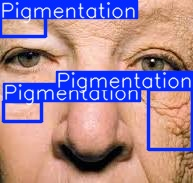

In [20]:
from ultralytics import YOLO
from IPython.display import Image, display
import os

# تحميل أفضل نموذج تم تدريبه
model = YOLO("/kaggle/working/best_model_pigmentation.pt")

# التنبؤ على صورة اختبار
results = model.predict(
    source="/kaggle/input/zzzzzzzzzzxx/WhatsApp Image 2025-06-10 at 18.59.44_a4216aa7.jpg",
    conf=0.2,
    iou=0.5,
    save=True,
    show_conf=False,     # إخفاء النسبة المئوية
    show_labels=True     # عرض اسم الكلاس "Acne" (غيّره لـ False لو مش عايزه يظهر)
)

# عرض النتيجة
output_dir = results[0].save_dir
image_files = [f for f in os.listdir(output_dir) if f.endswith((".jpg", ".jpeg", ".png"))]

if image_files:
    display(Image(filename=os.path.join(output_dir, image_files[0])))
else:
    print("❌ لم يتم العثور على صورة ناتجة.")


In [13]:
from ultralytics import YOLO

# تحميل أفضل نموذج
model = YOLO("/kaggle/working/best_model_pigmentation.pt")  # أو أي مسار لنموذجك

# تقييم النموذج على مجموعة الـ validation أو test
metrics = model.val(
    data="data.yaml",    # نفس ملف الداتا المستخدم في التدريب
    split="test",        # أو "val" لو عايز تستخدم مجموعة التحقق
    iou=0.5,
    conf=0.25,
    plots=True           # يرسم لك confusion matrix ونتائج إضافية
)

# طباعة النتائج
print(metrics.results_dict)


Ultralytics 8.3.152 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs
val: Fast image access ✅ (ping: 1.4±0.3 ms, read: 81.3±29.6 MB/s, size: 37.6 KB)


val: Scanning /kaggle/input/pigmentation2/Pigmentation/test/labels... 48 images, 0 backgrounds, 7 corrupt: 100%|██████████| 48/48 [00:00<00:00, 562.25it/s]

val: /kaggle/input/pigmentation2/Pigmentation/test/images/360_F_353187956_xaaYvl21cJG2AuHYIXT7FjWvmWgCttfh_jpg.rf.7a221ac40052f74695da632b38ec7196.jpg: ignoring corrupt image/label: Label class 2 exceeds dataset class count 1. Possible class labels are 0-0
val: /kaggle/input/pigmentation2/Pigmentation/test/images/89_jpg.rf.a3518076291a63045c0cfb87293dc37c.jpg: ignoring corrupt image/label: Label class 3 exceeds dataset class count 1. Possible class labels are 0-0
val: /kaggle/input/pigmentation2/Pigmentation/test/images/Acne-Pimple_jpg.rf.aea772b38af18b3b46b21baf30e9f3bf.jpg: ignoring corrupt image/label: Label class 2 exceeds dataset class count 1. Possible class labels are 0-0
val: /kaggle/input/pigmentation2/Pigmentation/test/images/P1010130_JPG_jpg.rf.eee862e382c01aa7869fafeb4ccf14b1.jpg: ignoring corrupt image/label: Label class 1 exceeds dataset class count 1. Possible class labels are 0-0
val: /kaggle/input/pigmentation2/Pigmentation/test/images/depigmentation_jpg.rf.37afdd98ef4


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.55it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all         41        133      0.777      0.564      0.665       0.37
Speed: 5.1ms preprocess, 27.7ms inference, 0.0ms loss, 2.7ms postprocess per image
Results saved to runs/detect/val
{'metrics/precision(B)': 0.7770692673947122, 'metrics/recall(B)': 0.5639097744360902, 'metrics/mAP50(B)': 0.665321361010633, 'metrics/mAP50-95(B)': 0.37031243933910535, 'fitness': 0.3998133315062581}


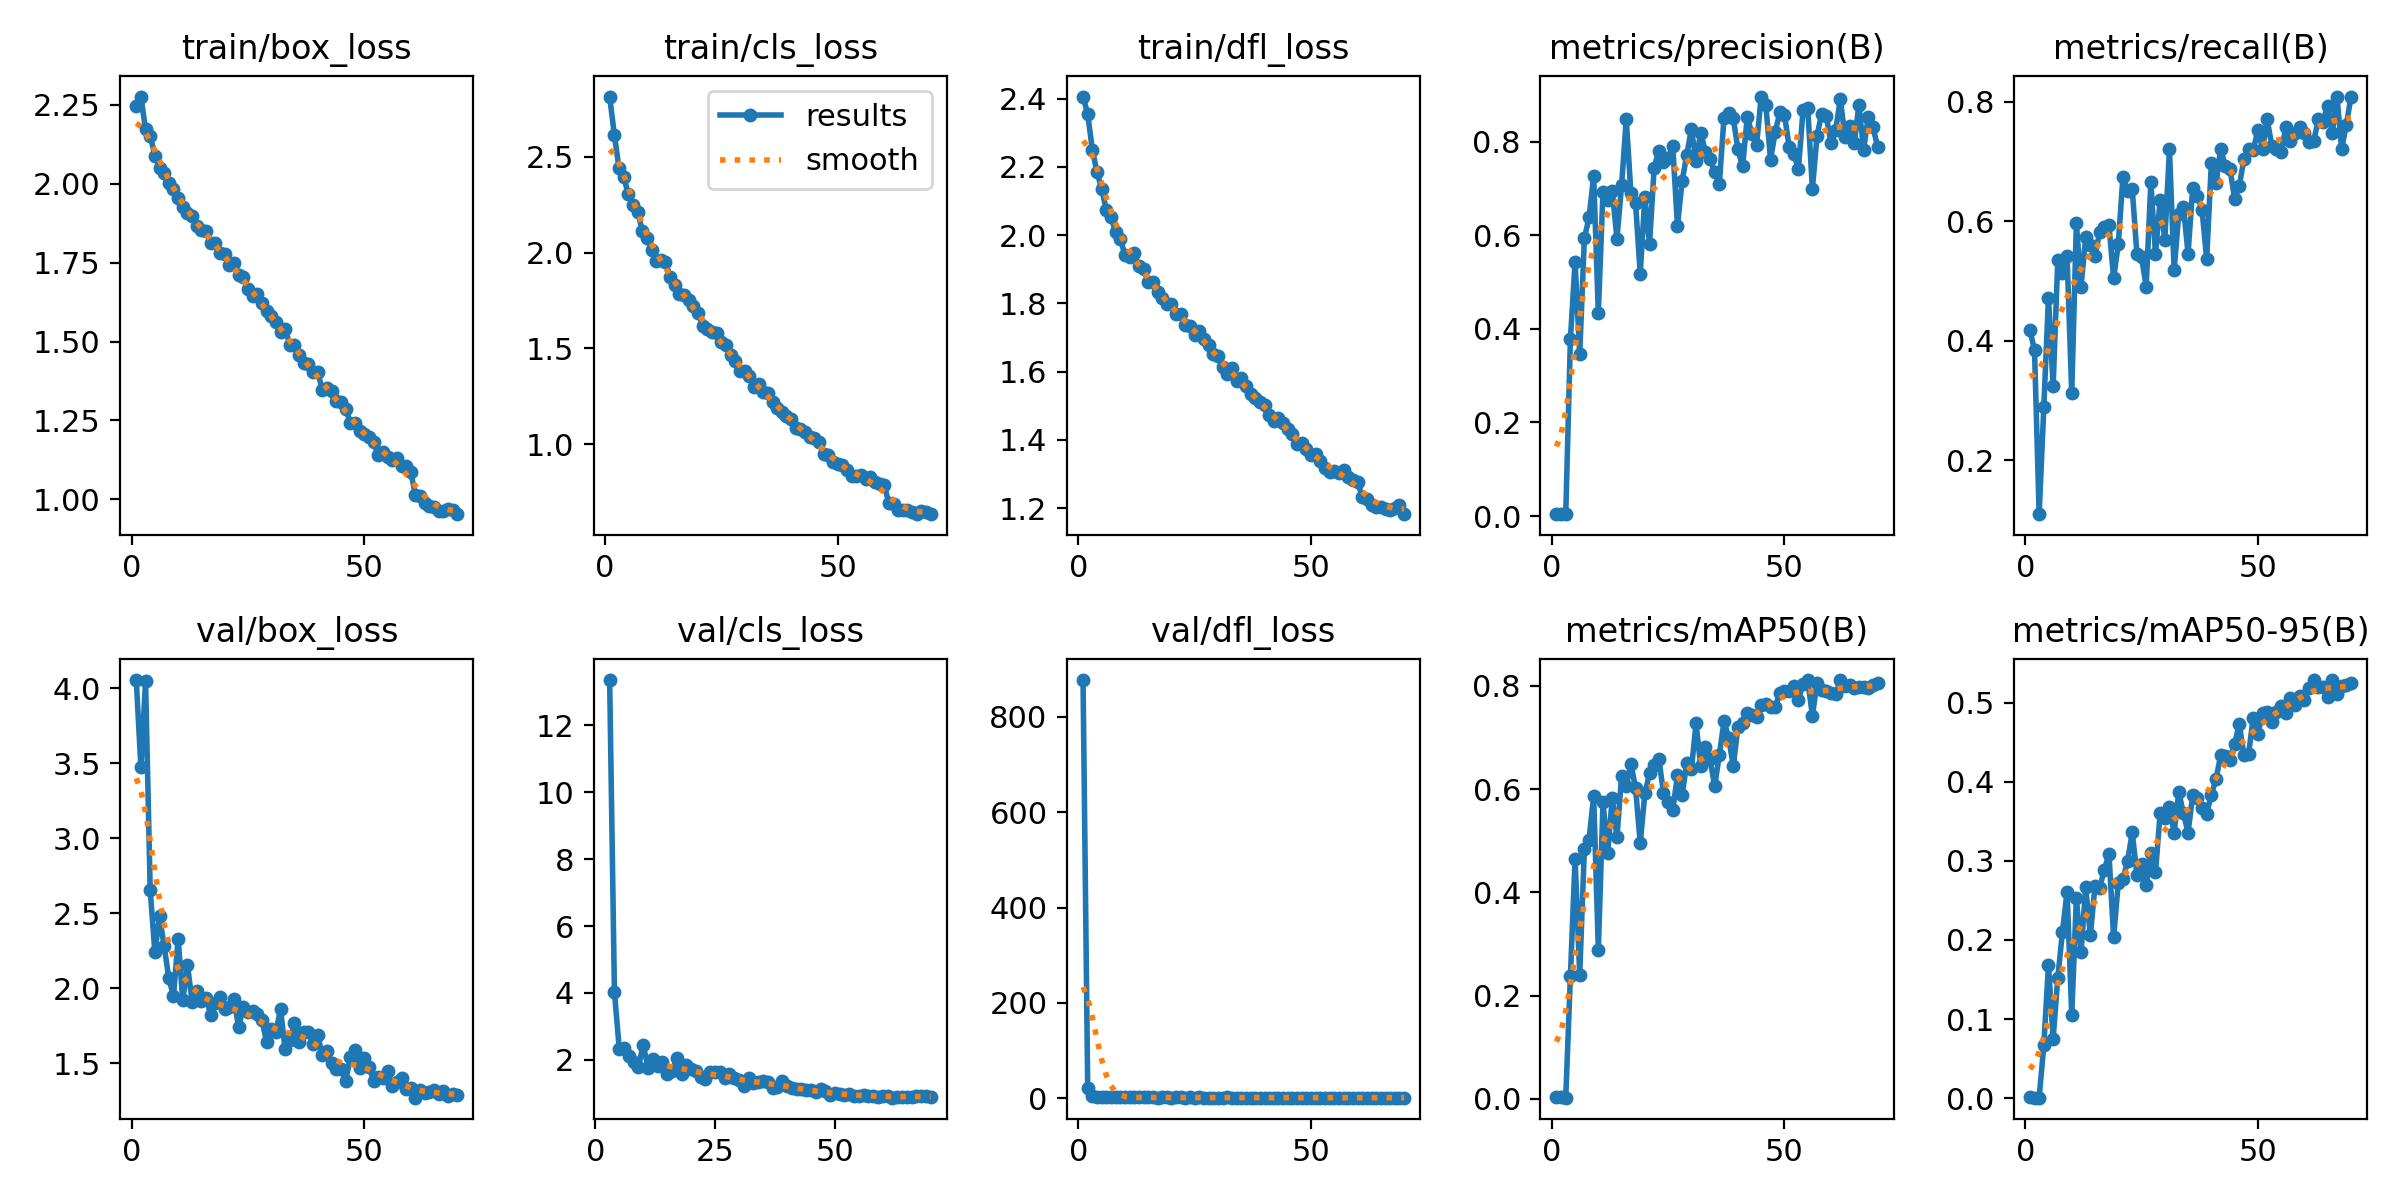

In [14]:
from IPython.display import Image, display

# Displaying the training and evaluation curves
results_path = "/kaggle/working/runs/detect/pigmentation_yolo_finetune/results.png"
display(Image(filename=results_path))


0: 640x640 3 Pigmentations, 23.2ms
1: 640x640 2 Pigmentations, 23.2ms
2: 640x640 4 Pigmentations, 23.2ms
3: 640x640 6 Pigmentations, 23.2ms
4: 640x640 1 Pigmentation, 23.2ms
5: 640x640 5 Pigmentations, 23.2ms
6: 640x640 3 Pigmentations, 23.2ms
7: 640x640 6 Pigmentations, 23.2ms
8: 640x640 4 Pigmentations, 23.2ms
9: 640x640 4 Pigmentations, 23.2ms
10: 640x640 2 Pigmentations, 23.2ms
11: 640x640 3 Pigmentations, 23.2ms
12: 640x640 2 Pigmentations, 23.2ms
13: 640x640 13 Pigmentations, 23.2ms
14: 640x640 9 Pigmentations, 23.2ms
15: 640x640 3 Pigmentations, 23.2ms
16: 640x640 2 Pigmentations, 23.2ms
17: 640x640 4 Pigmentations, 23.2ms
18: 640x640 3 Pigmentations, 23.2ms
19: 640x640 6 Pigmentations, 23.2ms
20: 640x640 4 Pigmentations, 23.2ms
21: 640x640 9 Pigmentations, 23.2ms
22: 640x640 4 Pigmentations, 23.2ms
23: 640x640 3 Pigmentations, 23.2ms
24: 640x640 2 Pigmentations, 23.2ms
25: 640x640 3 Pigmentations, 23.2ms
26: 640x640 5 Pigmentations, 23.2ms
27: 640x640 4 Pigmentations, 23.2ms
2

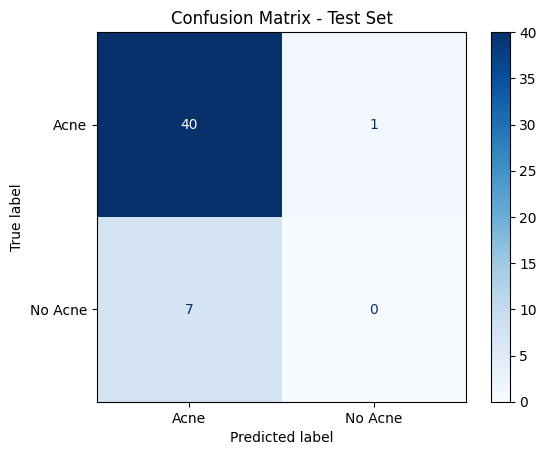

In [16]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from pathlib import Path

# 1️⃣ استخراج القيم الحقيقية (Ground Truth) من ملفات تصنيفات test
labels_dir = Path("/kaggle/input/pigmentation2/Pigmentation/test/labels")
image_files = list(Path("/kaggle/input/pigmentation2/Pigmentation/test/images").glob("*.jpg"))

y_true = []
for image_file in image_files:
    label_file = labels_dir / (image_file.stem + ".txt")
    if label_file.exists():
        with open(label_file, "r") as f:
            lines = f.readlines()
        # إذا كان هناك كائن class 0 → اعتبرها موجبة (positive)
        y_true.append(1 if any(line.strip().startswith("0 ") for line in lines) else 0)
    else:
        y_true.append(0)

# 2️⃣ استخراج القيم المتوقعة (Predicted Labels) من نموذج YOLO
results = model([str(p) for p in image_files])  # تأكدي من تمرير قائمة الصور كنصوص

# تحقق من عدد النتائج
if len(results) != len(image_files):
    raise ValueError(f"Mismatch: {len(image_files)} images vs {len(results)} YOLO results")

y_pred = []
for r in results:
    boxes = r.boxes
    pred_classes = boxes.cls.cpu().numpy() if boxes is not None else []
    y_pred.append(1 if 0 in pred_classes else 0)

# 3️⃣ حساب مصفوفة الالتباس
cm = confusion_matrix(y_true, y_pred, labels=[1, 0])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Acne", "No Acne"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Test Set")
plt.show()

In [2]:
# import os
# import shutil

# # نسخ البيانات إلى مجلد قابل للكتابة
# source_dir = "/kaggle/input/pigmentation2/Pigmentation"
# target_dir = "/kaggle/working/Pigmentation"

# shutil.copytree(source_dir, target_dir, dirs_exist_ok=True)

# # تعديل كل ملفات labels لتكون class = 0
# for split in ["train", "valid", "test"]:
#     labels_dir = os.path.join(target_dir, split, "labels")
#     for filename in os.listdir(labels_dir):
#         if filename.endswith(".txt"):
#             path = os.path.join(labels_dir, filename)
#             with open(path, "r") as f:
#                 lines = f.readlines()

#             new_lines = []
#             for line in lines:
#                 parts = line.strip().split()
#                 parts[0] = "0"
#                 new_lines.append(" ".join(parts))

#             with open(path, "w") as f:
#                 f.write("\n".join(new_lines))


In [3]:
# data_yaml = """
# train: /kaggle/input/pigmentation2/Pigmentation/train/images
# val: /kaggle/input/pigmentation2/Pigmentation/valid/images

# nc: 1
# names: ["Pigmentation"]
# """

# with open("data.yaml", "w") as f:
#     f.write(data_yaml)


In [4]:
# !pip install ultralytics --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 18.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00:00:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 3.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 31.7 MB/s eta 0:00:0000:0100:01


In [ ]:

# from ultralytics import YOLO

# model = YOLO("yolov8s.pt")

# model.train(
#     data="data.yaml",
#     epochs=100,
#     imgsz=640,
#     batch=8,
#     name="pigmentation_yolo"
   
# )


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 21.5M/21.5M [00:00<00:00, 145MB/s]


Ultralytics 8.3.152 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=pigmentation_yolo, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, 

100%|██████████| 755k/755k [00:00<00:00, 17.5MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 67.7MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.2±0.2 ms, read: 75.3±18.2 MB/s, size: 41.2 KB)


train: Scanning /kaggle/input/pigmentation2/Pigmentation/train/labels... 1304 images, 15 backgrounds, 189 corrupt: 100%|██████████| 1304/1304 [00:01<00:00, 900.85it/s]

train: /kaggle/input/pigmentation2/Pigmentation/train/images/1-23-700x420_jpg.rf.204ad5ecea85ca6d5fc26bdb8452bbc5.jpg: ignoring corrupt image/label: Label class 1 exceeds dataset class count 1. Possible class labels are 0-0
train: /kaggle/input/pigmentation2/Pigmentation/train/images/1-23-700x420_jpg.rf.570dbe353d789ca5f4f8791f869f3314.jpg: ignoring corrupt image/label: Label class 1 exceeds dataset class count 1. Possible class labels are 0-0
train: /kaggle/input/pigmentation2/Pigmentation/train/images/1-23-700x420_jpg.rf.76a784fc6bbb34762a78f03bc6765f7f.jpg: ignoring corrupt image/label: Label class 1 exceeds dataset class count 1. Possible class labels are 0-0
train: /kaggle/input/pigmentation2/Pigmentation/train/images/1-23-700x420_jpg.rf.9e93c38d53c5dda70815b234f460c5ce.jpg: ignoring corrupt image/label: Label class 1 exceeds dataset class count 1. Possible class labels are 0-0
train: /kaggle/input/pigmentation2/Pigmentation/train/images/1-23-700x420_jpg.rf.a388cc15030f986e3b8a89f

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.9±1.0 ms, read: 65.6±21.4 MB/s, size: 39.6 KB)


val: Scanning /kaggle/input/pigmentation2/Pigmentation/valid/labels... 96 images, 3 backgrounds, 13 corrupt: 100%|██████████| 96/96 [00:00<00:00, 827.74it/s]

val: /kaggle/input/pigmentation2/Pigmentation/valid/images/308_jpg.rf.a6a13eac66547aea7249c2930efe3348.jpg: ignoring corrupt image/label: Label class 2 exceeds dataset class count 1. Possible class labels are 0-0
val: /kaggle/input/pigmentation2/Pigmentation/valid/images/5_jpg.rf.316959176a8076ff4cf9eda5147c4ce6.jpg: ignoring corrupt image/label: Label class 2 exceeds dataset class count 1. Possible class labels are 0-0
val: /kaggle/input/pigmentation2/Pigmentation/valid/images/800wm_jpg.rf.f24615e2d461eeb8b721ccb1cf2051ee.jpg: ignoring corrupt image/label: Label class 2 exceeds dataset class count 1. Possible class labels are 0-0
val: /kaggle/input/pigmentation2/Pigmentation/valid/images/DS13_PNG_jpg.rf.bfe7d38dddce0b1e57a3d62ecdf75be5.jpg: ignoring corrupt image/label: Label class 2 exceeds dataset class count 1. Possible class labels are 0-0
val: /kaggle/input/pigmentation2/Pigmentation/valid/images/DS20_PNG_jpg.rf.f63ef51644fd5327fd27133bae407d90.jpg: ignoring corrupt image/label: 

Plotting labels to runs/detect/pigmentation_yolo/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/pigmentation_yolo
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      1.97G      2.074      2.587      2.014         11        640: 100%|██████████| 140/140 [00:21<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.50it/s]

                   all         83        218     0.0707      0.161     0.0477     0.0111



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.39G       2.07      2.319      1.997         20        640: 100%|██████████| 140/140 [00:19<00:00,  7.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.01it/s]

                   all         83        218      0.247       0.35      0.225     0.0749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.43G      2.078      2.315      2.029         13        640: 100%|██████████| 140/140 [00:19<00:00,  7.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.10it/s]

                   all         83        218       0.24      0.294      0.147     0.0349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.46G      2.041       2.26      1.973         25        640: 100%|██████████| 140/140 [00:19<00:00,  7.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.44it/s]


                   all         83        218       0.31      0.289      0.202     0.0606

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100       2.5G      1.998      2.202      1.925         20        640: 100%|██████████| 140/140 [00:19<00:00,  7.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.89it/s]


                   all         83        218      0.628      0.431      0.503      0.199

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.54G      1.986      2.145      1.906         14        640: 100%|██████████| 140/140 [00:19<00:00,  7.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.89it/s]


                   all         83        218      0.426      0.532      0.433      0.169

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.57G      1.945       2.08      1.898         20        640: 100%|██████████| 140/140 [00:19<00:00,  7.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.69it/s]


                   all         83        218      0.395      0.468      0.343      0.134

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.61G      1.917      2.027      1.854         22        640: 100%|██████████| 140/140 [00:19<00:00,  7.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.91it/s]


                   all         83        218      0.587      0.483      0.528      0.261

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.65G      1.906      2.036      1.838         13        640: 100%|██████████| 140/140 [00:19<00:00,  7.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.07it/s]


                   all         83        218      0.757      0.486      0.565      0.251

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.68G      1.891      2.002      1.843         17        640: 100%|██████████| 140/140 [00:19<00:00,  7.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.96it/s]


                   all         83        218      0.567      0.505      0.533      0.274

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.72G       1.86      1.976      1.814         18        640: 100%|██████████| 140/140 [00:19<00:00,  7.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.75it/s]

                   all         83        218      0.765       0.55      0.588      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.76G      1.839      1.937      1.809         17        640: 100%|██████████| 140/140 [00:19<00:00,  7.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.04it/s]

                   all         83        218      0.544      0.619       0.55      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.79G      1.815      1.876       1.78         12        640: 100%|██████████| 140/140 [00:19<00:00,  7.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.06it/s]

                   all         83        218      0.793      0.587      0.618      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.99G      1.783      1.847      1.755         25        640: 100%|██████████| 140/140 [00:19<00:00,  7.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.11it/s]

                   all         83        218      0.588      0.537      0.507      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      3.03G       1.76       1.81      1.739         13        640: 100%|██████████| 140/140 [00:19<00:00,  7.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.16it/s]

                   all         83        218      0.759      0.601      0.671      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      3.06G      1.779      1.805      1.738         20        640: 100%|██████████| 140/140 [00:19<00:00,  7.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.71it/s]


                   all         83        218      0.697      0.463       0.52      0.255

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100       3.1G      1.749      1.751      1.722         15        640: 100%|██████████| 140/140 [00:19<00:00,  7.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.97it/s]

                   all         83        218      0.772      0.573      0.619      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      3.13G       1.72      1.692      1.701          9        640: 100%|██████████| 140/140 [00:19<00:00,  7.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.67it/s]


                   all         83        218      0.737      0.578      0.663      0.336

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      3.17G      1.712      1.706      1.682         24        640: 100%|██████████| 140/140 [00:19<00:00,  7.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.03it/s]


                   all         83        218      0.704      0.578      0.562      0.287

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      3.21G      1.701      1.691      1.686         20        640: 100%|██████████| 140/140 [00:19<00:00,  7.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.52it/s]

                   all         83        218      0.831      0.608      0.671      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      3.24G      1.691       1.65      1.684         12        640: 100%|██████████| 140/140 [00:19<00:00,  7.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.54it/s]

                   all         83        218      0.775      0.706      0.719      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      3.28G      1.652      1.586      1.646         11        640: 100%|██████████| 140/140 [00:19<00:00,  7.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.34it/s]

                   all         83        218       0.76       0.58      0.654      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      3.32G       1.61      1.524      1.612         15        640: 100%|██████████| 140/140 [00:19<00:00,  7.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.40it/s]

                   all         83        218      0.734      0.647      0.696      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      3.38G      1.615      1.537       1.62         15        640: 100%|██████████| 140/140 [00:19<00:00,  7.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.15it/s]


                   all         83        218      0.775      0.656      0.711      0.393

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      3.43G      1.602      1.534      1.608          9        640: 100%|██████████| 140/140 [00:19<00:00,  7.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.43it/s]

                   all         83        218      0.809      0.665      0.673      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      3.52G      1.579      1.503      1.585         12        640: 100%|██████████| 140/140 [00:19<00:00,  7.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.38it/s]

                   all         83        218      0.687      0.644      0.697      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      3.58G      1.575      1.476      1.593         16        640: 100%|██████████| 140/140 [00:19<00:00,  7.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.01it/s]

                   all         83        218      0.781      0.656      0.649      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      3.64G      1.561      1.477      1.585         11        640: 100%|██████████| 140/140 [00:19<00:00,  7.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.87it/s]


                   all         83        218      0.783      0.633      0.725      0.414

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      3.71G      1.528      1.416      1.558         19        640: 100%|██████████| 140/140 [00:19<00:00,  7.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.96it/s]

                   all         83        218       0.73      0.671      0.719      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100       3.9G      1.561      1.434      1.578         13        640: 100%|██████████| 140/140 [00:19<00:00,  7.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.91it/s]

                   all         83        218      0.816      0.672      0.723      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      3.94G      1.548      1.414       1.56         14        640: 100%|██████████| 140/140 [00:19<00:00,  7.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.25it/s]

                   all         83        218      0.787      0.645      0.697      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      3.97G      1.546      1.375      1.555         10        640: 100%|██████████| 140/140 [00:19<00:00,  7.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.91it/s]

                   all         83        218      0.812      0.729      0.748      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      4.01G        1.5      1.373      1.538         39        640: 100%|██████████| 140/140 [00:19<00:00,  7.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.00it/s]

                   all         83        218       0.79      0.619      0.659      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      4.04G      1.474      1.317      1.509         32        640: 100%|██████████| 140/140 [00:19<00:00,  7.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.26it/s]

                   all         83        218      0.796      0.647       0.67      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      4.24G      1.468      1.322      1.512          7        640: 100%|██████████| 140/140 [00:19<00:00,  7.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.37it/s]

                   all         83        218      0.936      0.661      0.744      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      4.28G      1.439       1.28      1.496         14        640: 100%|██████████| 140/140 [00:19<00:00,  7.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.41it/s]

                   all         83        218      0.793      0.649      0.748      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      4.32G      1.432      1.269      1.489         10        640: 100%|██████████| 140/140 [00:19<00:00,  7.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.09it/s]

                   all         83        218      0.845      0.674      0.744      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      4.35G       1.41       1.24       1.47         18        640: 100%|██████████| 140/140 [00:19<00:00,  7.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.21it/s]

                   all         83        218      0.857      0.642      0.703      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      4.39G      1.441       1.25      1.483         17        640: 100%|██████████| 140/140 [00:19<00:00,  7.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.94it/s]

                   all         83        218      0.851      0.654      0.733       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      4.43G      1.422      1.203      1.473         19        640: 100%|██████████| 140/140 [00:19<00:00,  7.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.05it/s]

                   all         83        218       0.83      0.628      0.735      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      4.49G      1.392        1.2      1.453          8        640: 100%|██████████| 140/140 [00:19<00:00,  7.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.16it/s]

                   all         83        218      0.769      0.688      0.752      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      4.56G      1.387      1.196      1.448         24        640: 100%|██████████| 140/140 [00:19<00:00,  7.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.00it/s]

                   all         83        218        0.9      0.615       0.74      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      4.62G      1.374      1.158      1.432         10        640: 100%|██████████| 140/140 [00:19<00:00,  7.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.18it/s]

                   all         83        218      0.849      0.591      0.708      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      4.83G      1.388      1.147      1.437         21        640: 100%|██████████| 140/140 [00:19<00:00,  7.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.45it/s]

                   all         83        218      0.842      0.647      0.731       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      4.86G      1.349      1.139      1.413         16        640: 100%|██████████| 140/140 [00:19<00:00,  7.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.19it/s]

                   all         83        218      0.838      0.596      0.717      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100       4.9G      1.323      1.125       1.41         12        640: 100%|██████████| 140/140 [00:19<00:00,  7.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.57it/s]

                   all         83        218      0.875      0.688      0.776      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      4.94G       1.33      1.092      1.403         19        640: 100%|██████████| 140/140 [00:19<00:00,  7.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.04it/s]

                   all         83        218      0.795      0.748       0.78      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      4.97G      1.319      1.091      1.407          7        640: 100%|██████████| 140/140 [00:19<00:00,  7.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.10it/s]

                   all         83        218      0.844      0.761      0.805      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      5.01G      1.296      1.069      1.389         15        640: 100%|██████████| 140/140 [00:19<00:00,  7.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.29it/s]

                   all         83        218      0.842      0.702      0.767      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      5.06G      1.257      1.018      1.342         20        640: 100%|██████████| 140/140 [00:19<00:00,  7.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.16it/s]

                   all         83        218      0.852      0.739      0.791      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      5.13G      1.277      1.024      1.365         13        640: 100%|██████████| 140/140 [00:19<00:00,  7.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.09it/s]

                   all         83        218      0.903      0.661      0.774      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100       5.2G       1.27      1.027      1.373         26        640: 100%|██████████| 140/140 [00:19<00:00,  7.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.47it/s]

                   all         83        218       0.92      0.761      0.836      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      5.26G      1.267      1.019       1.36         12        640: 100%|██████████| 140/140 [00:19<00:00,  7.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.68it/s]

                   all         83        218      0.789      0.729      0.786      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      5.35G       1.24     0.9806      1.348         12        640: 100%|██████████| 140/140 [00:19<00:00,  7.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.33it/s]

                   all         83        218      0.855      0.743      0.793      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      5.38G      1.256      1.003      1.355         12        640: 100%|██████████| 140/140 [00:19<00:00,  7.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.27it/s]

                   all         83        218      0.848      0.714      0.761      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      5.58G      1.242     0.9874      1.337         12        640: 100%|██████████| 140/140 [00:19<00:00,  7.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.23it/s]

                   all         83        218      0.858      0.734      0.802      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      5.62G      1.216     0.9576      1.328         21        640: 100%|██████████| 140/140 [00:19<00:00,  7.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.22it/s]

                   all         83        218      0.818      0.697      0.756      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      5.65G      1.202     0.9695      1.321         12        640: 100%|██████████| 140/140 [00:19<00:00,  7.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.07it/s]

                   all         83        218      0.805      0.718      0.756      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      5.69G      1.197      0.921      1.321          9        640: 100%|██████████| 140/140 [00:19<00:00,  7.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.43it/s]

                   all         83        218      0.935      0.723      0.807      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      5.72G       1.18     0.9077      1.303         39        640:  48%|████▊     | 67/140 [00:09<00:10,  7.07it/s]

In [ ]:
# results = model.val()
# print(results)


In [ ]:
# # تقييم الموديل
# metrics = model.val()
# print(f"Precision: {metrics.box.p}")
# print(f"Recall: {metrics.box.r}")
# print(f"mAP@0.5: {metrics.box.map50}")
# print(f"mAP@0.5:0.95: {metrics.box.map}")



In [ ]:
from IPython.display import Image, display

results = model.predict(
    source="/kaggle/input/pppppppppp/WhatsApp Image 2025-06-10 at 19.59.13_53986eb1.jpg",  # ← غيّري الاسم
    conf=0.3,
    save=True
)

output_dir = results[0].save_dir
image_files = [f for f in os.listdir(output_dir) if f.lower().endswith((".jpg", ".jpeg", ".png"))]

if image_files:
    image_path = os.path.join(output_dir, image_files[0])
    display(Image(filename=image_path))
else:
    print("❌ لم يتم العثور على أي صورة.")


In [ ]:
model.save("/kaggle/working/pigmentation_yolov8.pt")

In [ ]:
from IPython.display import Image, display

# Displaying the training and evaluation curves
results_path = "/kaggle/working/runs/detect/pigmentation_yolo/results.png"
display(Image(filename=results_path))


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from pathlib import Path

# 1️⃣ استخراج القيم الحقيقية (Ground Truth) من ملفات تصنيفات test
labels_dir = Path("/kaggle/working/Pigmentation/test/labels")
image_files = list(Path("/kaggle/working/Pigmentation/test/images").glob("*.jpg"))

y_true = []
for image_file in image_files:
    label_file = labels_dir / (image_file.stem + ".txt")
    if label_file.exists():
        with open(label_file, "r") as f:
            lines = f.readlines()
        # إذا كان هناك كائن class 0 → اعتبرها موجبة (positive)
        y_true.append(1 if any(line.strip().startswith("0 ") for line in lines) else 0)
    else:
        y_true.append(0)

# 2️⃣ استخراج القيم المتوقعة (Predicted Labels) من نموذج YOLO
results = model([str(p) for p in image_files])  # تأكدي من تمرير قائمة الصور كنصوص

# تحقق من عدد النتائج
if len(results) != len(image_files):
    raise ValueError(f"Mismatch: {len(image_files)} images vs {len(results)} YOLO results")

y_pred = []
for r in results:
    boxes = r.boxes
    pred_classes = boxes.cls.cpu().numpy() if boxes is not None else []
    y_pred.append(1 if 0 in pred_classes else 0)

# 3️⃣ حساب مصفوفة الالتباس
cm = confusion_matrix(y_true, y_pred, labels=[1, 0])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Pigmentation", "No Pigmentation"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Test Set")
plt.show()
